## Importación de librerias 

In [2]:
# importamos las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, ImageColorGenerator
import warnings
warnings.filterwarnings("ignore")

## Carga del archivos CSV

In [4]:
# cargar el documento csv con pd.read_csv, creando el dataframe
df_salticidae_mexico_world = pd.read_csv('/Users/stam/Documents/Documents_MacBook_Eduardo/GitHub/jumping_spider_salticidae/limpieza/salticidae_mexico_world.csv')
df_salticidae_mexico = pd.read_csv('/Users/stam/Documents/Documents_MacBook_Eduardo/GitHub/jumping_spider_salticidae/limpieza/salticidae_mexico.csv')

## Análisis exploratorio

In [6]:
# datos cargados
# muestra las primeras filas del dataframe
df_salticidae_mexico_world.head(3)

,speciesId,species_lsid,family,genus,species,subspecies,author,year,parentheses,distribution
0,27925,urn:lsid:nmbe.ch:spidersp:032135,Salticidae,Acragas,hieroglyphicus,NaN,G. W. Peckham & E. G. Peckham,1896,1,Mexico to Panama
1,27937,urn:lsid:nmbe.ch:spidersp:032147,Salticidae,Acragas,quadriguttatus,NaN,F. O. Pickard-Cambridge,1901,1,Mexico to Panama
2,28092,urn:lsid:nmbe.ch:spidersp:032266,Salticidae,Alcmena,amabilis,NaN,C. L. Koch,1846,0,Mexico


In [7]:
# dimensión del dataframe
print(f"Número de filas: {df_salticidae_mexico_world.shape[0]}")
print(f"Número de columnas: {df_salticidae_mexico_world.shape[1]}")

Número de filas: 255
Número de columnas: 10


In [8]:
# datos cargados
# muestra las primeras filas del dataframe
df_salticidae_mexico.head(3)

,speciesId,species_lsid,family,genus,species,subspecies,author,year,parentheses,distribution
0,28092,urn:lsid:nmbe.ch:spidersp:032266,Salticidae,Alcmena,amabilis,NaN,C. L. Koch,1846,0,Mexico
1,28114,urn:lsid:nmbe.ch:spidersp:032285,Salticidae,Amycus,flavolineatus,NaN,C. L. Koch,1846,0,Mexico
2,28132,urn:lsid:nmbe.ch:spidersp:032299,Salticidae,Anicius,dolius,NaN,Chamberlin,1925,0,Mexico


In [9]:
# dimensión del dataframe
print(f"Número de filas: {df_salticidae_mexico.shape[0]}")
print(f"Número de columnas: {df_salticidae_mexico.shape[1]}")

Número de filas: 105
Número de columnas: 10


### Arañas salticidae en México

In [11]:
# crear una paleta de colores con 'viridis'
colors = sns.color_palette('viridis', n_colors=10)[::-1]

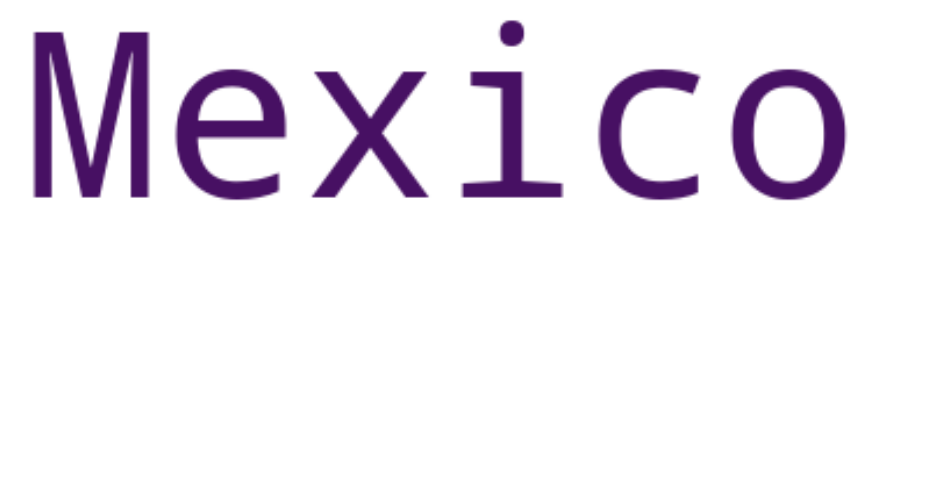

In [12]:
#word cloud
# Generar el texto a partir de los paises
text = " ".join(df_salticidae_mexico['distribution'].astype(str))

# Crear la nube de palabras
wordcloud = WordCloud(
    max_words=200,
    max_font_size=100,
    colormap='viridis',
    background_color="white"
).generate(text)

# Configurar y mostrar el gráfico
plt.figure(figsize=(12, 8))  # Establecer el tamaño de la figura
plt.imshow(wordcloud, interpolation='bilinear')  # Mostrar la nube de palabras
plt.axis("off")  # Ocultar ejes
plt.show()  # Mostrar la figura

Especies descritas por año:
year
1846    10
1880     1
1888     2
1889     1
1896     1
1898     7
1901    21
1924     5
1925     2
1948     2
1951     1
1980     3
1987    13
1993     2
1996     5
1999     2
2004     9
2008     2
2014     2
2015     1
2017     5
2019     5
2020     2
2021     1
Name: count, dtype: int64


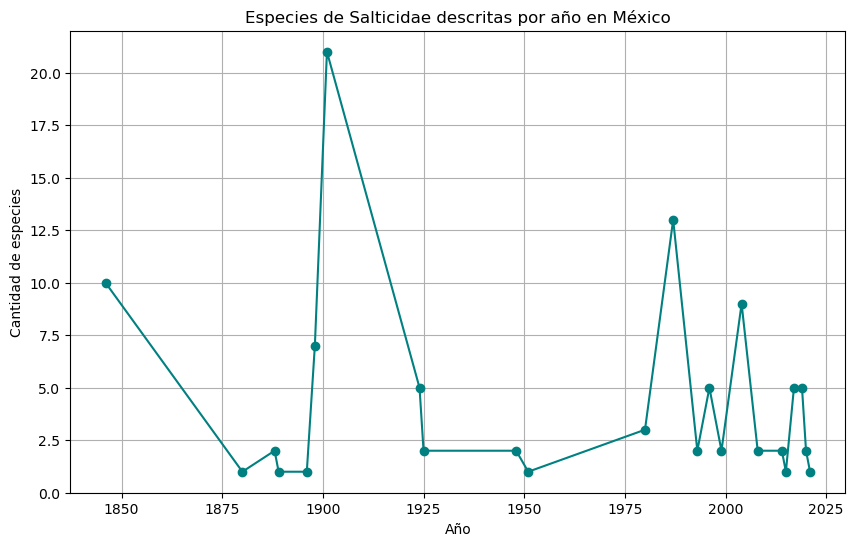

In [13]:
#¿Cómo ha cambiado el descubrimiento de especies a lo largo del tiempo?
# Contar el número de especies descritas por año
especies_por_ano = df_salticidae_mexico['year'].value_counts().sort_index()
print("Especies descritas por año:")
print(especies_por_ano)

# Graficar la tendencia
especies_por_ano.plot(kind='line', figsize=(10, 6), marker='o', color='teal')
plt.title("Especies de Salticidae descritas por año en México")
plt.xlabel("Año")
plt.ylabel("Cantidad de especies")
plt.grid(True)
plt.show()

In [14]:
#¿Cuántos géneros únicos de Salticidae hay en México?
generos_unicos = df_salticidae_mexico['genus'].nunique()
print(f"Géneros únicos de Salticidae en México: {generos_unicos}")

Géneros únicos de Salticidae en México: 30


In [15]:
#¿Cuál es el género con mayor cantidad de especies en México?
generos_mas_diversos = df_salticidae_mexico['genus'].value_counts()
print("Género con mayor cantidad de especies:")
print(generos_mas_diversos.head(1))

Género con mayor cantidad de especies:
genus
Habronattus    23
Name: count, dtype: int64


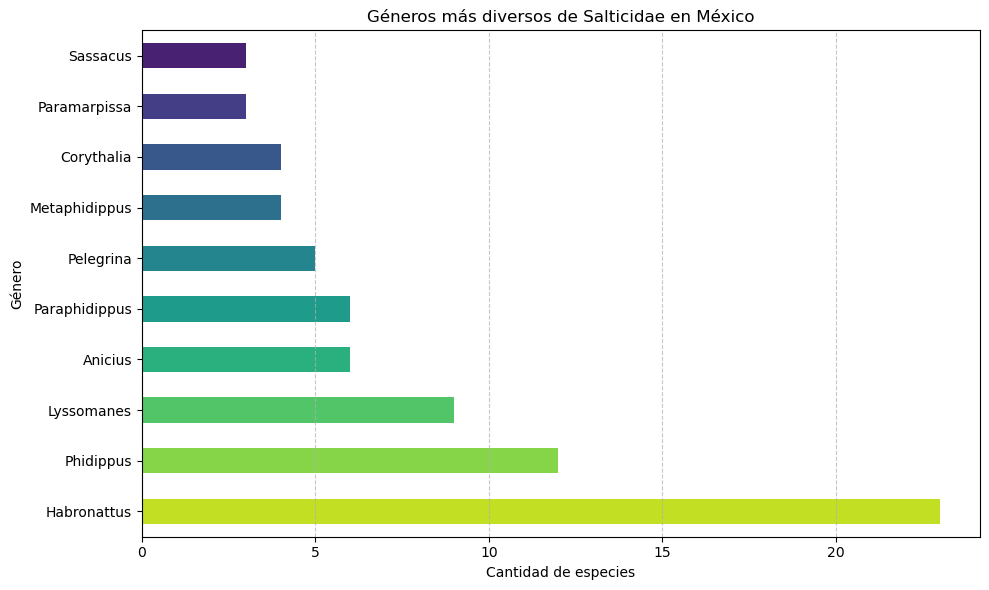

In [16]:
generos_mas_diversos.head(10).plot(kind='barh', color=colors, figsize=(10, 6))
plt.title('Géneros más diversos de Salticidae en México')
plt.xlabel('Cantidad de especies')
plt.ylabel('Género')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

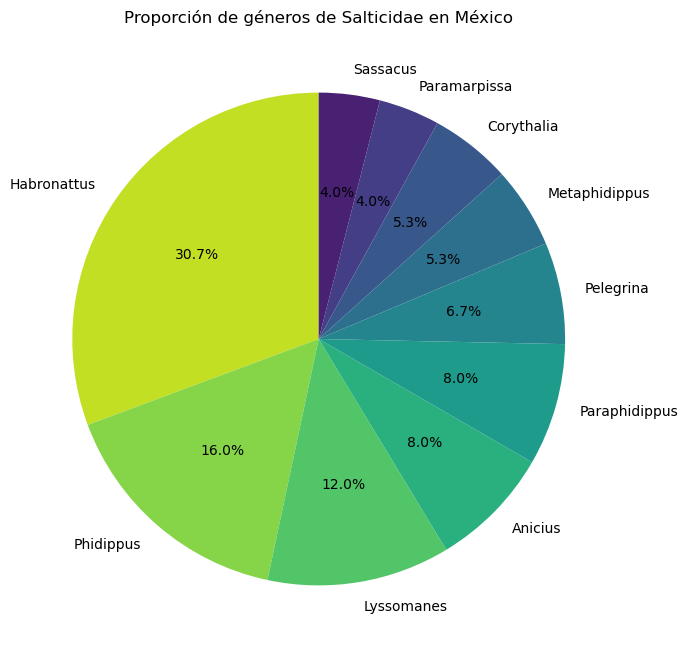

In [17]:
generos_mas_diversos.head(10).plot(kind='pie', autopct='%1.1f%%',colors=colors, figsize=(8, 8), startangle=90)
plt.title('Proporción de géneros de Salticidae en México')
plt.ylabel('')
plt.show()

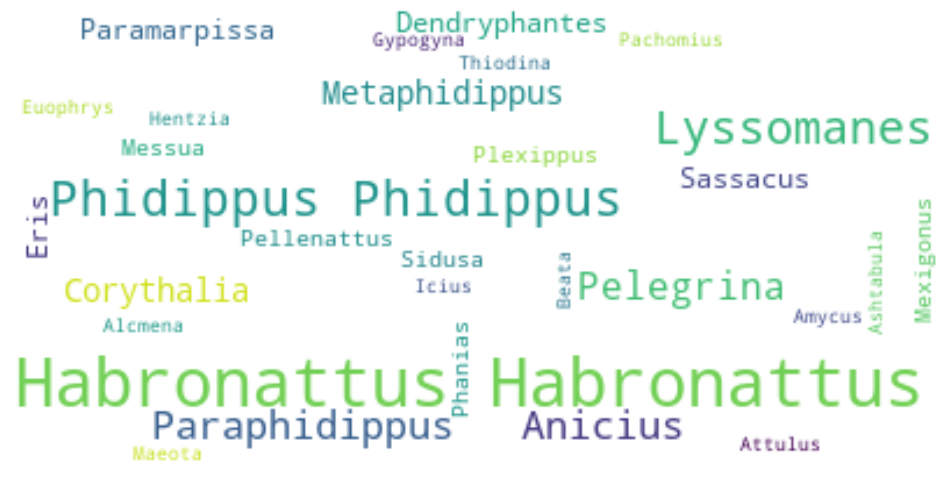

In [18]:
#word cloud
# Generar el texto a partir del genero
text = " ".join(df_salticidae_mexico['genus'].astype(str))

# Crear la nube de palabras
wordcloud = WordCloud(
    max_words=200,
    max_font_size=100,
    colormap='viridis',
    background_color="white"
).generate(text)

# Configurar y mostrar el gráfico
plt.figure(figsize=(12, 8))  # Establecer el tamaño de la figura
plt.imshow(wordcloud, interpolation='bilinear')  # Mostrar la nube de palabras
plt.axis("off")  # Ocultar ejes
plt.show()  # Mostrar la figura

In [19]:
#¿Cuántas especies únicas de Salticidae hay en México?
especies_unicas = df_salticidae_mexico['species'].nunique()
print(f"Especies únicas de Salticidae en México: {especies_unicas}")

Especies únicas de Salticidae en México: 102


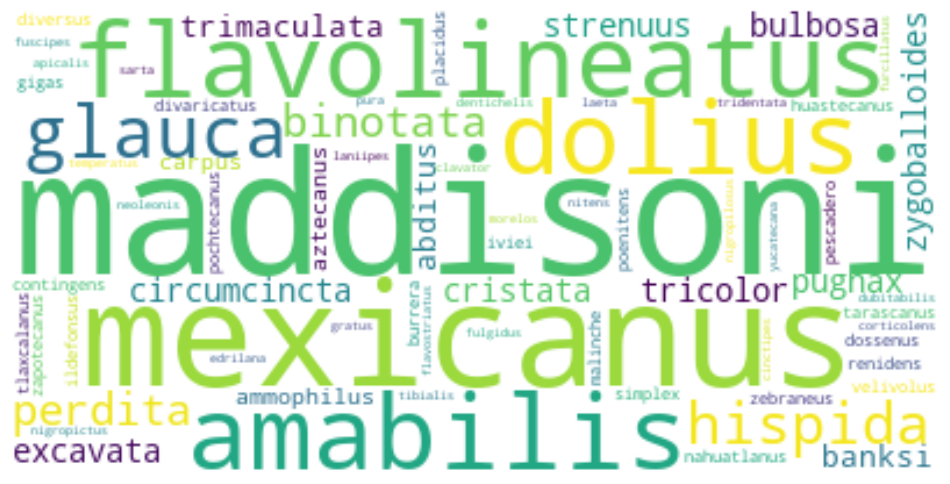

In [20]:
#word cloud
# Generar el texto a partir de las especies
text = " ".join(df_salticidae_mexico['species'].astype(str))

# Crear la nube de palabras
wordcloud = WordCloud(
    max_words=200,
    max_font_size=100,
    colormap='viridis',
    background_color="white"
).generate(text)

# Configurar y mostrar el gráfico
plt.figure(figsize=(12, 8))  # Establecer el tamaño de la figura
plt.imshow(wordcloud, interpolation='bilinear')  # Mostrar la nube de palabras
plt.axis("off")  # Ocultar ejes
plt.show()  # Mostrar la figura

In [21]:
#¿Cuáles son los autores más frecuentes en la descripción de estas especies?
autores_frecuentes = df_salticidae_mexico['author'].value_counts()
print("Autores más frecuentes en la descripción de especies:")
print(autores_frecuentes.head(10))

Autores más frecuentes en la descripción de especies:
author
F. O. Pickard-Cambridge          18
Griswold                         13
C. L. Koch                       10
Edwards                          10
Maddison                          9
Banks                             7
Chamberlin                        7
G. W. Peckham & E. G. Peckham     5
Guerrero-Fuentes & Francke        5
Galiano                           3
Name: count, dtype: int64


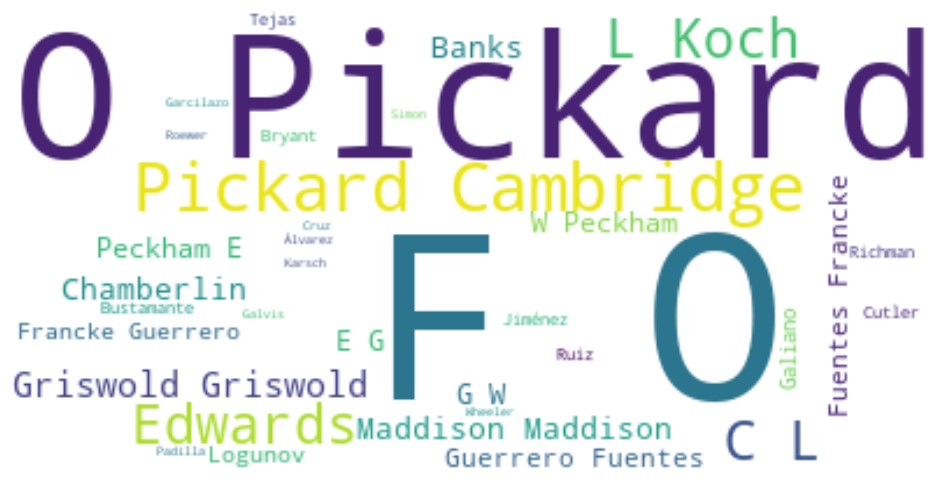

In [22]:
# Paso 1: Trabajar directamente con la columna 'author' sin modificar el DataFrame
authors_column = df_salticidae_mexico['author'].astype(str).str.replace("&", ",", regex=False)  # Reemplazar & con ,
authors_list = authors_column.str.split(',').explode()  # Dividir por "," y "explode" para separar nombres en filas

# Paso 2: Eliminar espacios adicionales y NaN
authors_list = authors_list.str.strip()  # Quitar espacios al inicio y al final
authors_list = authors_list.dropna()  # Eliminar valores NaN

# Paso 3: Generar el texto para la nube de palabras
text = " ".join(authors_list)

# Paso 4: Crear la nube de palabras
wordcloud = WordCloud(
    max_words=200,
    max_font_size=100,
    colormap='viridis',
    background_color="white"
).generate(text)

# Paso 5: Configurar y mostrar el gráfico
plt.figure(figsize=(12, 8))  # Establecer el tamaño de la figura
plt.imshow(wordcloud, interpolation='bilinear')  # Mostrar la nube de palabras
plt.axis("off")  # Ocultar ejes
plt.show()  # Mostrar la figura